<font>
<div dir=ltr align=center>
<img src='Sharif_logo.png' width=250 height=250> <br>
<font color=0F5298 size=7>
Applied Data Science<br>
<font color=2565AE size=5>
Spring 2025<br>
<font color=3C99D size=5>
HW3 - Data Visualization <br>
<font color=696880 size=4>
Ali Mohammadzade Shabestari - 401106482 - Computer Engineering



# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load Datasets

In the previous notebook, I cleaned Orders and Products datasets. I saved them in `Digikala Dataset` as `dff_orders.csv` and `dff_product.csv` folder and now I upload them to visualize data.

In [42]:
dff_orders = pd.read_csv('../Digikala Dataset/dff_orders.csv')
dff_product = pd.read_csv('../Digikala Dataset/dff_product.csv')

dff_orders['DateTime_CartFinalize'] = pd.to_datetime(dff_orders['DateTime_CartFinalize'])

# 3. Pie Plots

In this section I plot percentages of orders by city, and by province.

As you see, the order of provinces is not consistent with provinces of cities in city plot. For example, Gilan and Mazanadaran have a higher rank.

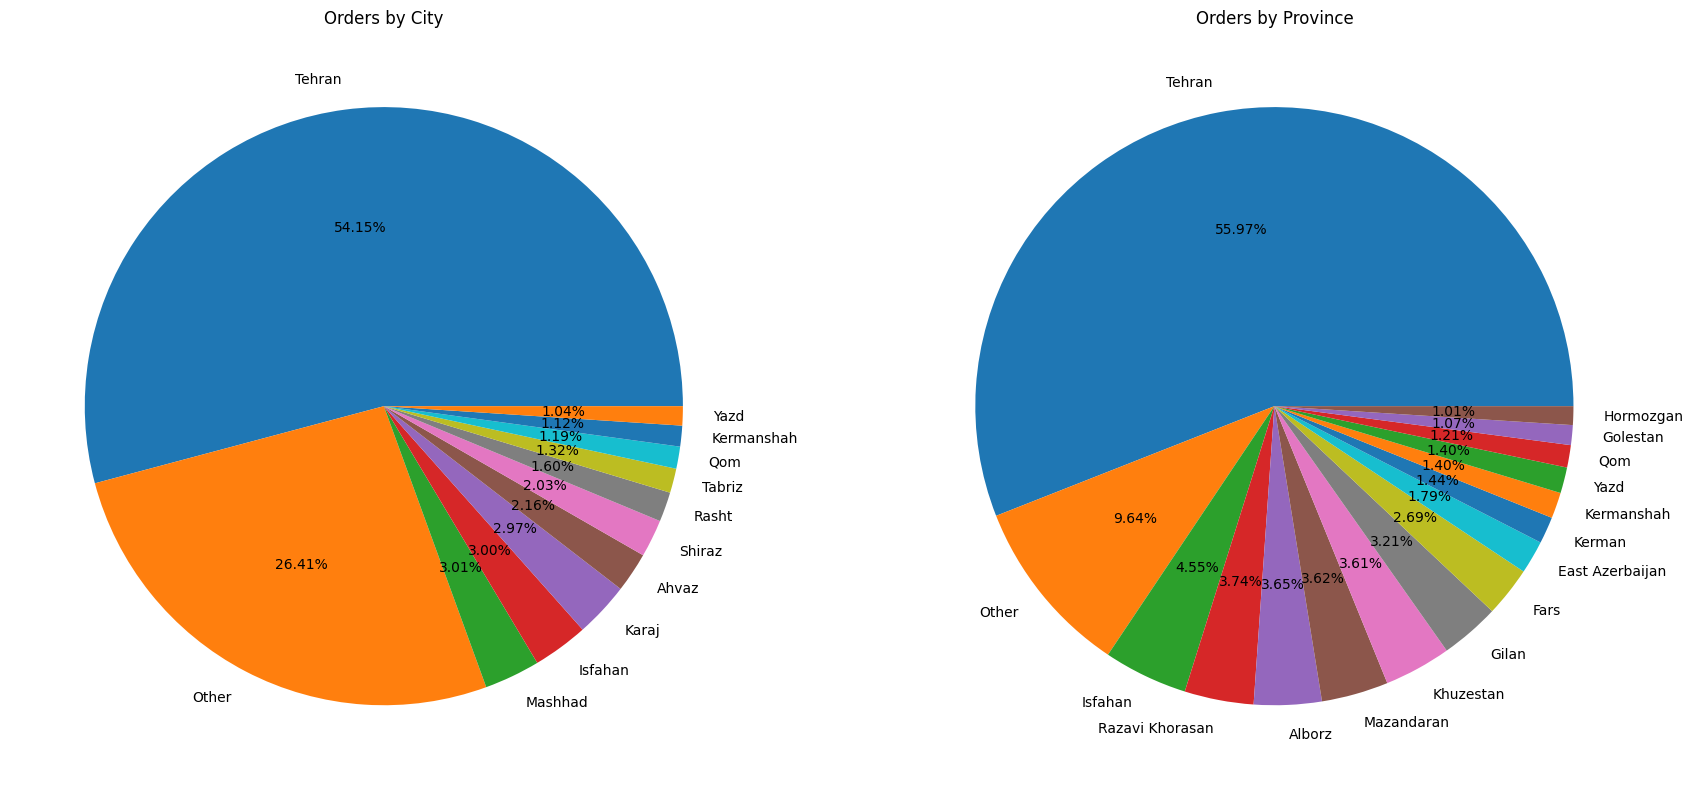

In [9]:
# Calculate the percentage of orders from each city
city_order_percentages = dff_orders['city'].value_counts(normalize=True) * 100

# Group all cities with less than 1% as "Other"
other_cities = city_order_percentages[city_order_percentages < 1].index
city_counts_grouped = city_order_percentages.copy()
city_counts_grouped.index = city_counts_grouped.index.where(~city_counts_grouped.index.isin(other_cities), 'Other')
city_counts_grouped = city_counts_grouped.groupby(city_counts_grouped.index).sum()
city_counts_grouped = city_counts_grouped.sort_values(ascending=False)

# Calculate the percentage of orders from each province
order_per_province = dff_orders['province'].value_counts()
order_per_province = order_per_province.sort_values(ascending=False).rename("order_count")
province_order_percentages = order_per_province / order_per_province.sum() * 100

# Group provinces with less than 1% as "Other"
other_provinces = province_order_percentages[province_order_percentages < 1].index
province_counts_grouped = province_order_percentages.copy()
province_counts_grouped.index = province_counts_grouped.index.where(~province_counts_grouped.index.isin(other_provinces), 'Other')
province_counts_grouped = province_counts_grouped.groupby(province_counts_grouped.index).sum()
province_counts_grouped = province_counts_grouped.sort_values(ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the city order percentage pie chart
city_counts_grouped.plot(kind='pie', autopct='%1.2f%%', ax=axes[0], title="Orders by City", legend=False)
axes[0].set_ylabel('')  # Remove y-label for better visualization

# Plot the province order percentage pie chart
province_counts_grouped.plot(kind='pie', autopct='%1.2f%%', ax=axes[1], title="Orders by Province", legend=False)
axes[1].set_ylabel('')  # Remove y-label for better visualization

# Display the plots
plt.tight_layout()
plt.show()

# 4. Box Plots

In this section, I plot a box plot of cities that have more than 0.01 percent of total orders, grouped by province.

As you see, Mazandarav has a great diversity of cities in Iran.

* I excluded Tehran city, because it was an extreme outlier.

In [13]:
df_cities = pd.read_excel('../Digikala Dataset/cities.xlsx', sheet_name='Sheet1')
province_mapping = dict(zip(df_cities['city_en'], df_cities['province']))

# Get the all cities by the number of orders
tops = dff_orders['city'].value_counts().reset_index()

# Add a new column for the percentage of orders
tops['percentage'] = tops['count'] / tops['count'].sum() * 100

# Include only cities with more than 0.01 percent
tops = tops[tops['percentage'] > 0.01]

# Add a new column for the province of each city
tops['province'] = tops['city'].map(province_mapping)

# Count the number of orders for each province in the top 300 cities
provinces_diversity = tops['province'].value_counts().sort_values(ascending=False).reset_index()

# Calculate median percentage per province to sort them
province_medians = tops.groupby("province", observed=True)["percentage"].median().sort_values()

# Convert 'province' to a categorical type with sorting order
tops["province"] = pd.Categorical(tops["province"], categories=province_medians.index, ordered=True)
tops1 = tops[tops['city'] != 'Tehran']

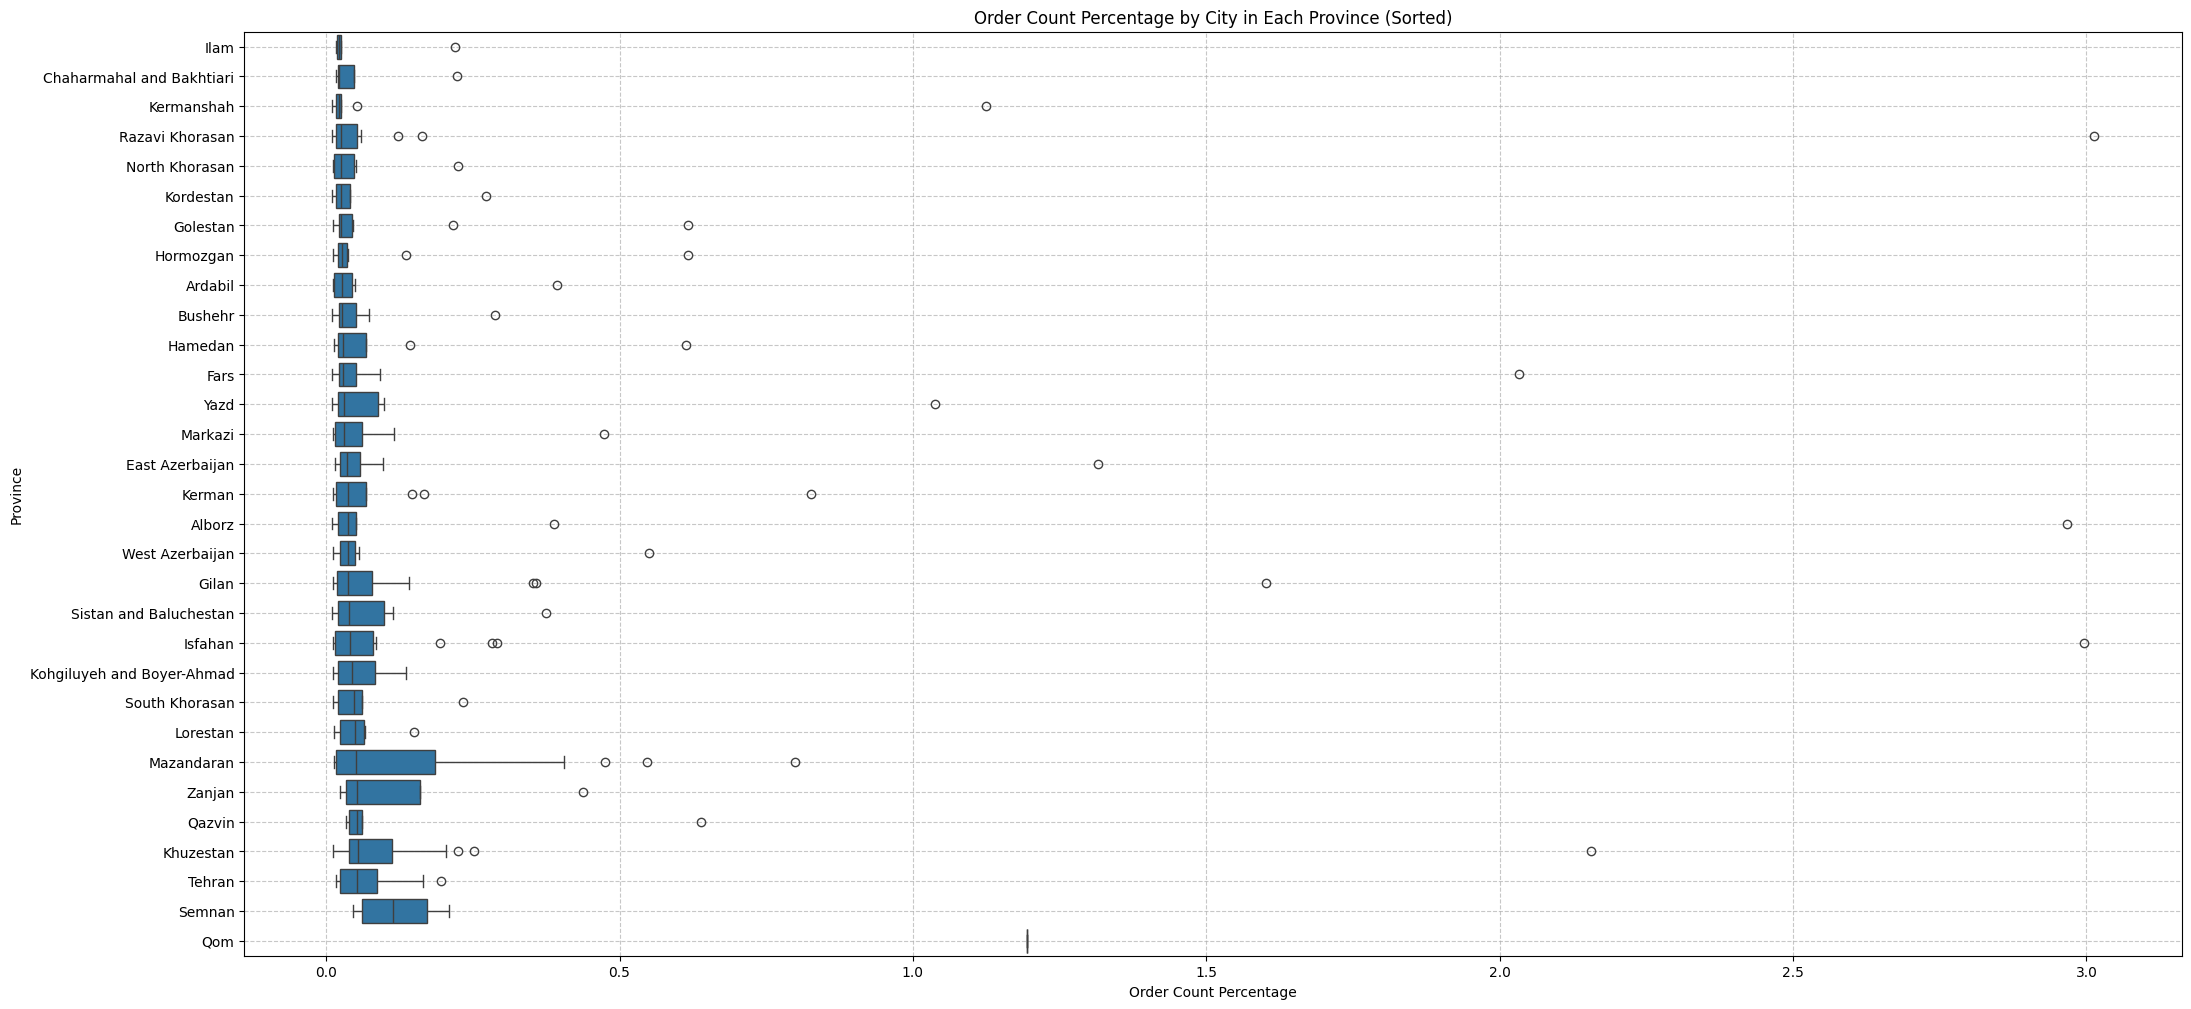

In [14]:
# Plot the sorted boxplot with outliers
plt.figure(figsize=(25, 12))
sns.boxplot(x='percentage', y='province', data=tops1, orient='h')
plt.title('Order Count Percentage by City in Each Province (Sorted)')
plt.xlabel('Order Count Percentage')
plt.ylabel('Province')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

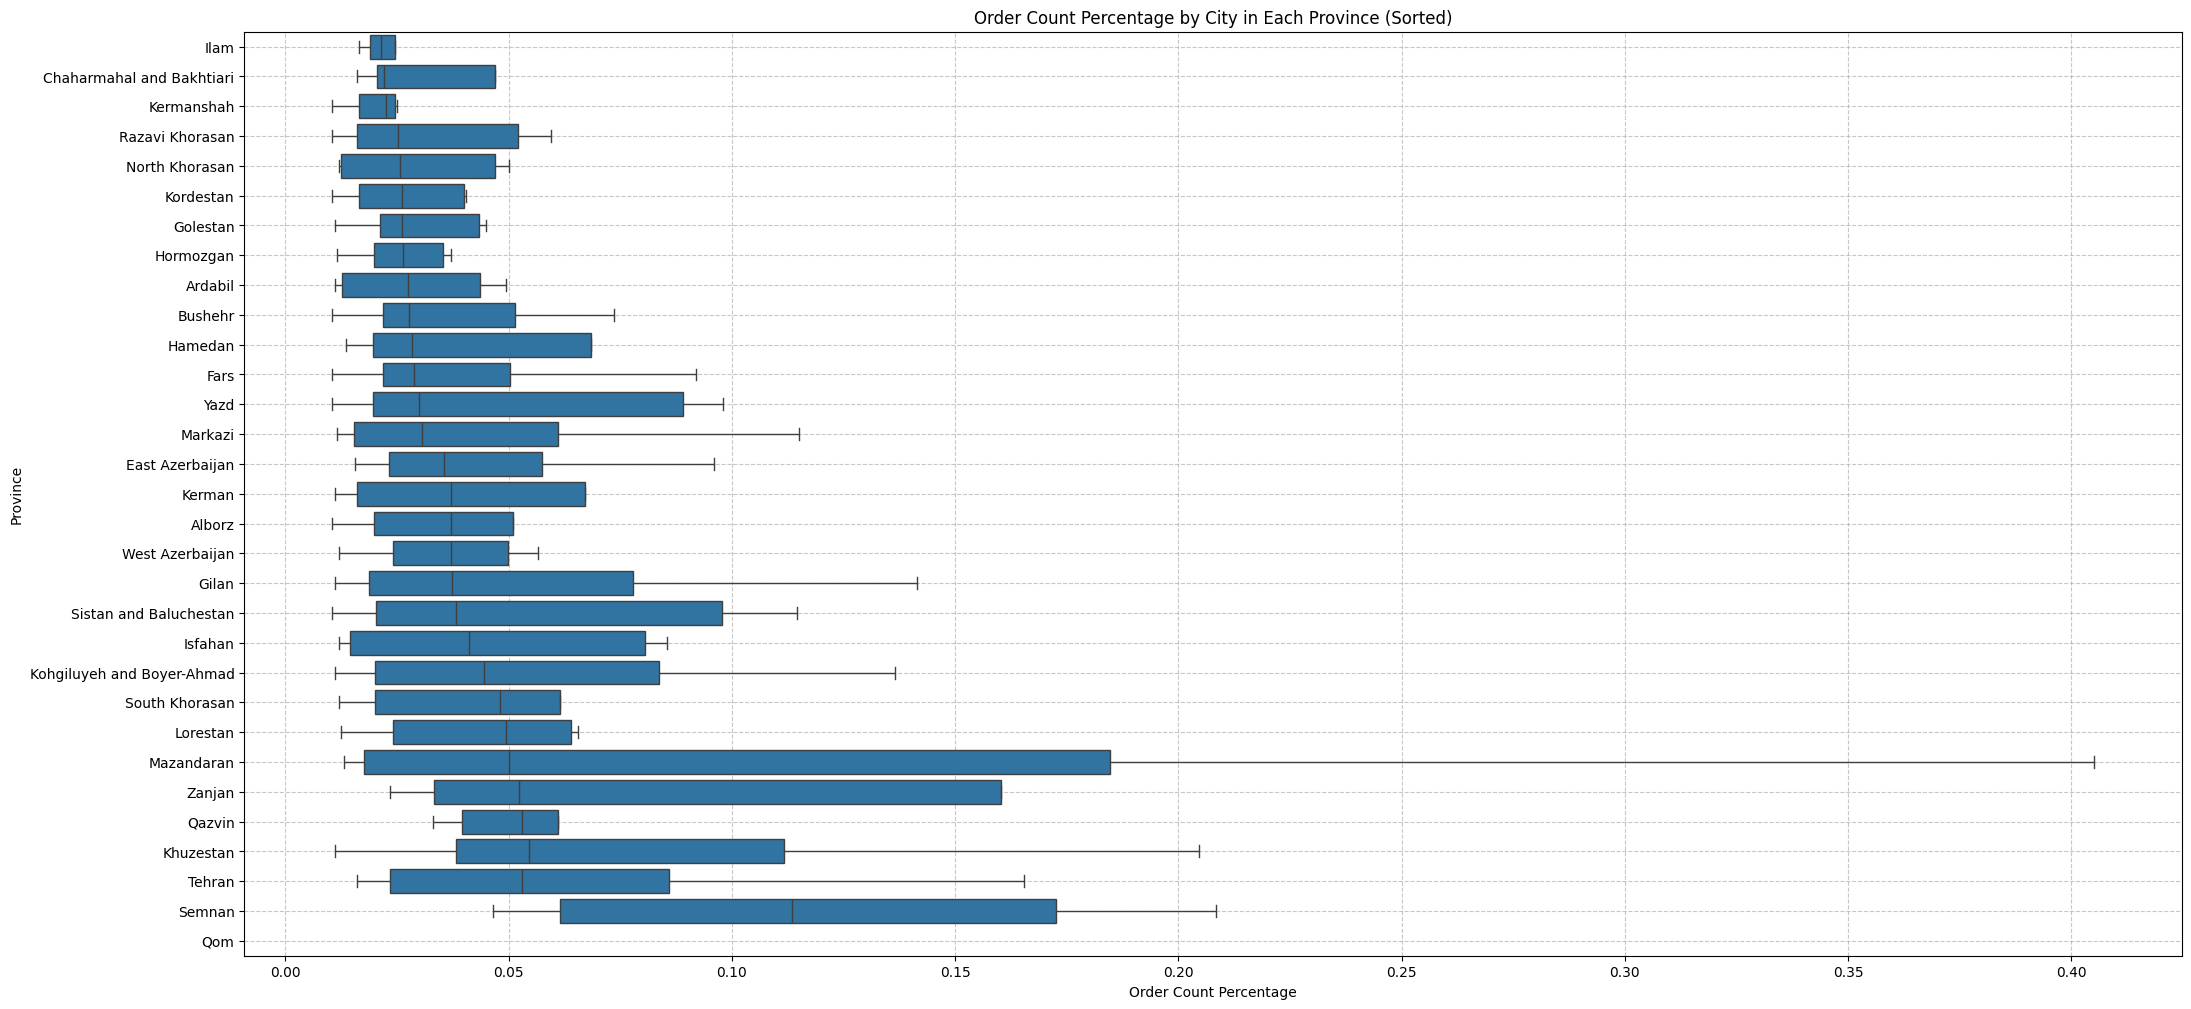

In [15]:
# Plot the sorted boxplot with outliers + exclude Qom
top2 = tops1[tops1['province'] != 'Qom']

plt.figure(figsize=(25, 12))
sns.boxplot(x='percentage', y='province', data=top2, orient='h', showfliers=False)
plt.title('Order Count Percentage by City in Each Province (Sorted)')
plt.xlabel('Order Count Percentage')
plt.ylabel('Province')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Line Charts

In this section I plot number of orders over time.

As you see, the net sale is increasing over years, while having some extreme peaks and valleys. (This subject was analyzed in EDA notebook)

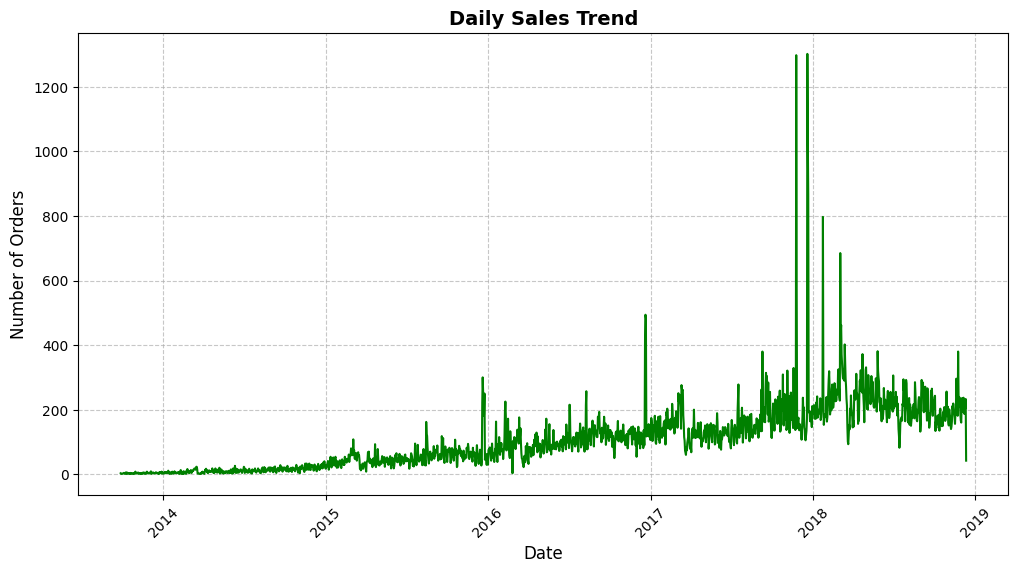

In [45]:
# Extract dates
dates = dff_orders['DateTime_CartFinalize'].dt.date

# Count number of orders per day + sort
orders_per_day = dates.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(orders_per_day.index, orders_per_day.values, color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

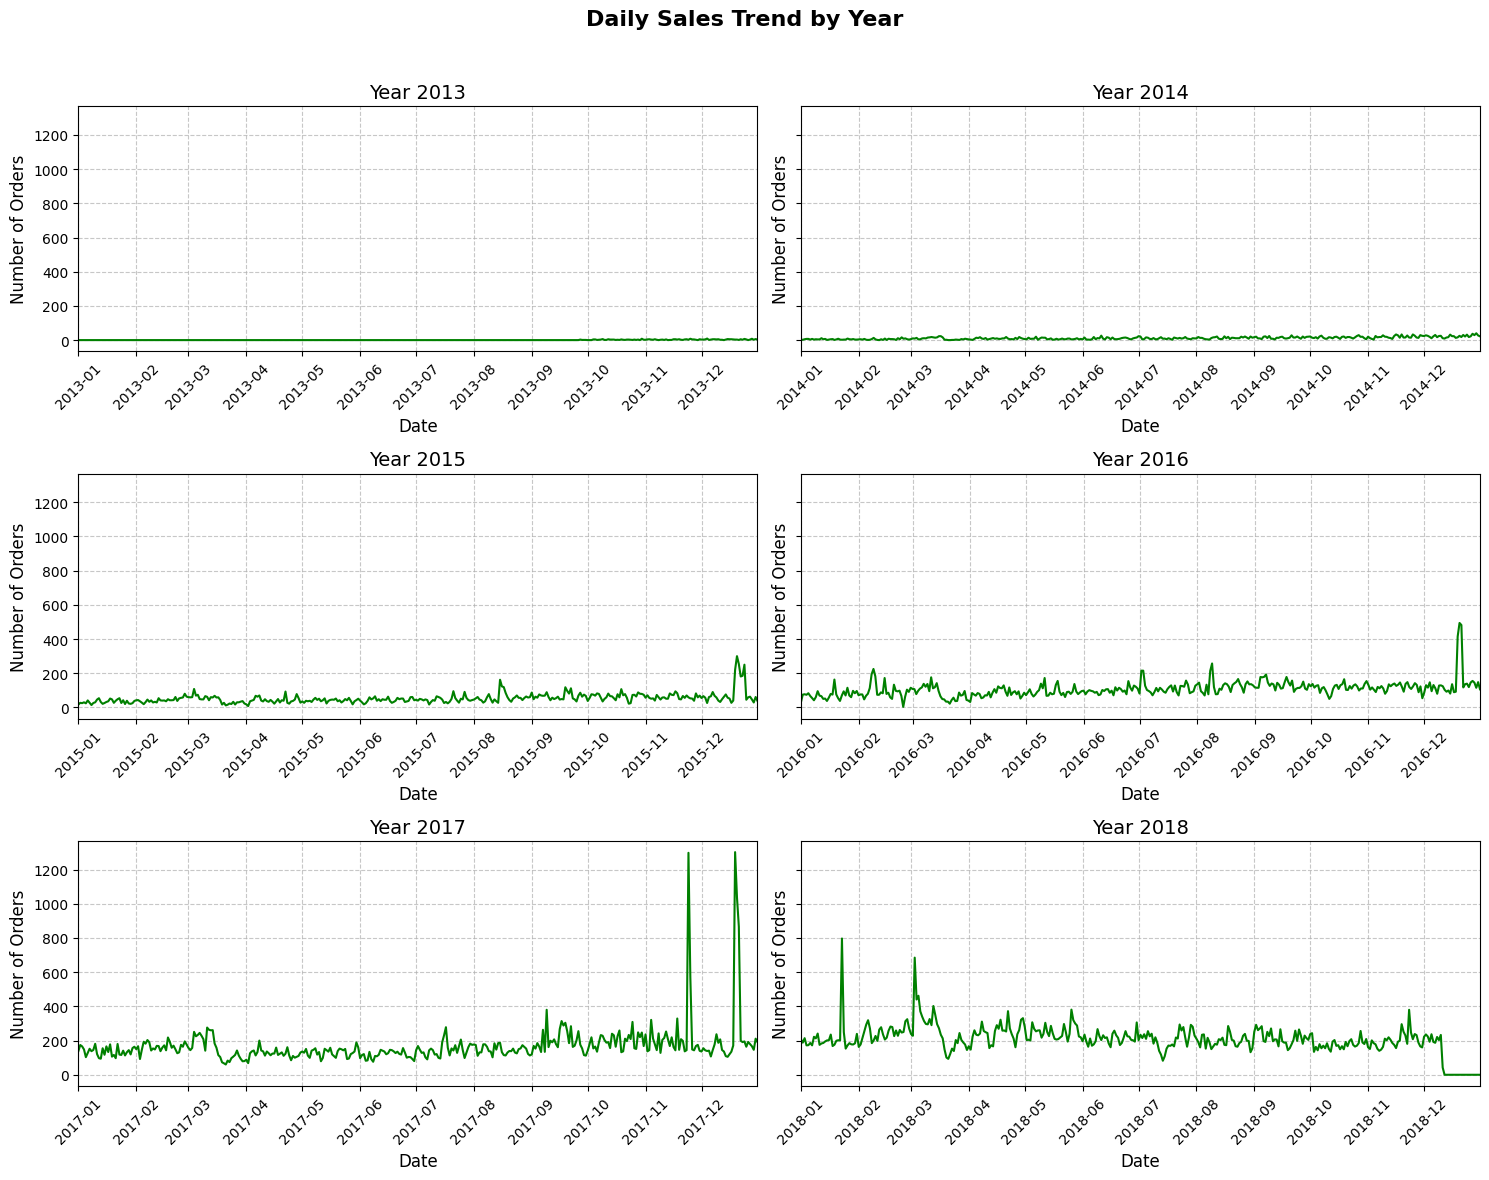

In [44]:
# Extract year and date from DateTime_CartFinalize
dff_orders['year'] = dff_orders['DateTime_CartFinalize'].dt.year
dff_orders['date'] = dff_orders['DateTime_CartFinalize'].dt.date

# Create a 3x2 subplot layout
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=False, sharey=True)
fig.suptitle('Daily Sales Trend by Year', fontsize=16, fontweight='bold')

# Sort years in ascending order
years = sorted(dff_orders['year'].unique())

# Iterate through each year and plot
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # Get the correct subplot

    # Filter data for the year
    yearly_data = dff_orders[dff_orders['year'] == year]

    # Count orders per day
    orders_per_day = yearly_data.groupby('date').size()

    # Create a full date range for the year (fills missing days)
    full_date_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    orders_per_day = orders_per_day.reindex(full_date_range, fill_value=0)  # Fill missing days with 0

    # Plot
    ax.plot(orders_per_day.index, orders_per_day.values, color='green')
    ax.set_title(f'Year {year}', fontsize=14)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Number of Orders', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set x-axis limits from January 1st to December 31st
    ax.set_xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))

    # Rotate x-axis labels for readability
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if years < 6
for j in range(i + 1, 6):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 6. Stacked Bar Charts

In this section, I visualize the monthly order trends for four selected cities using a stacked bar chart. The chosen cities are Tabriz, Rasht, Yazd and Sari. We first filter the dataset to include only these cities and then extract the year and month from the order dates. We group the data by year-month and city to count the number of orders per city per month. Finally, we plot the data using a stacked bar chart to show the distribution of orders across the selected cities over time. This visualization helps to identify trends and patterns in the order data for these specific cities.


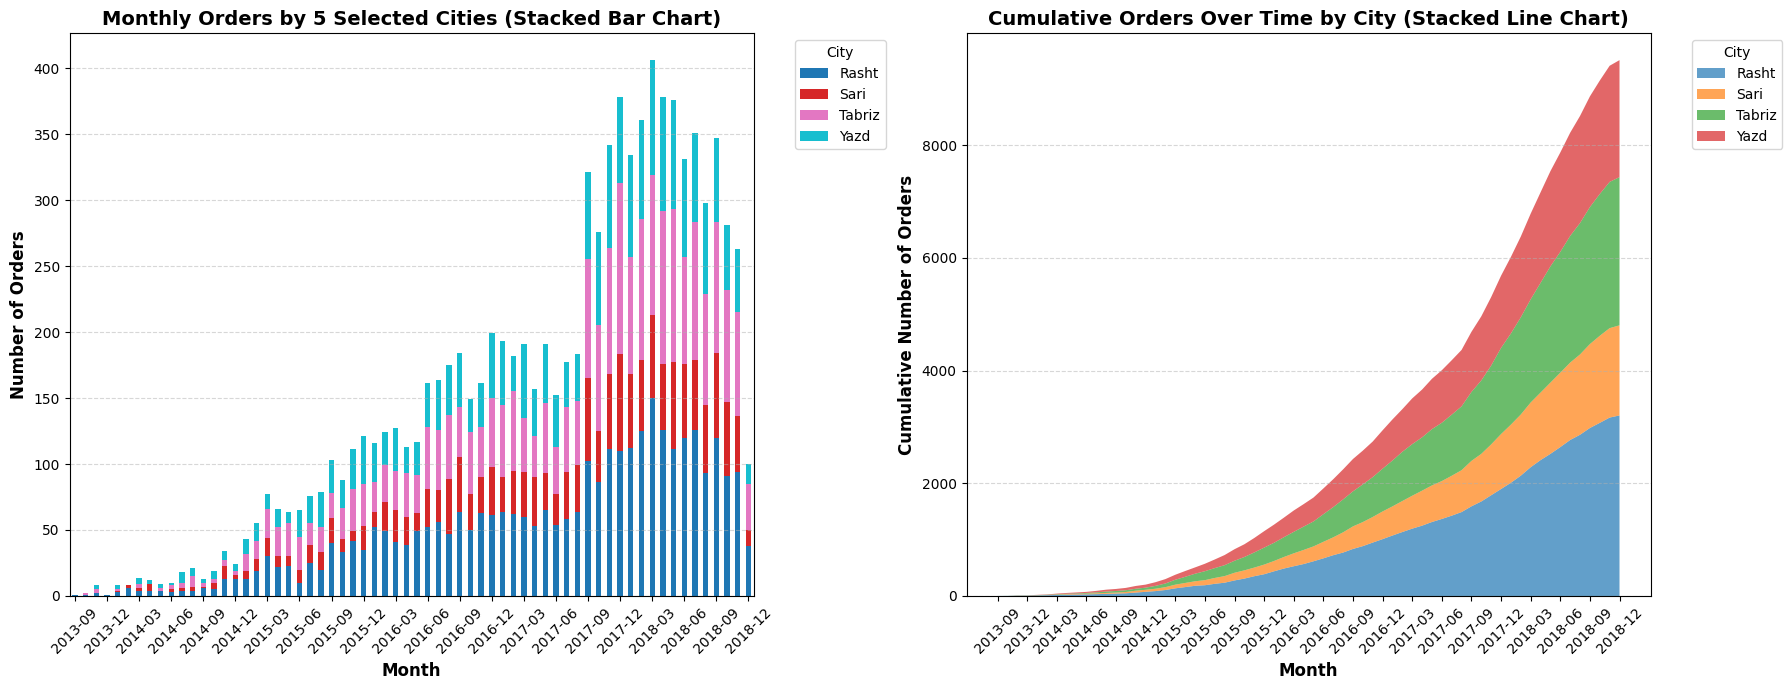

In [ ]:
# Ensure 'date' is in datetime format
dff_orders['date'] = pd.to_datetime(dff_orders['date'])

# Define an arbitrary list of 5 cities
chosen_cities = ['Tabriz', 'Rasht', 'Yazd', 'Sari']

# Filter only the selected 5 cities
filtered_data = dff_orders[dff_orders['city'].isin(chosen_cities)].copy()

# Extract Year-Month column
filtered_data['year_month'] = filtered_data['date'].dt.to_period('M')

# Count orders per city per month
orders_per_city_per_month = filtered_data.groupby(['year_month', 'city']).size().unstack(fill_value=0)

# Convert to cumulative sum for stacking effect (for line chart)
orders_cumulative = orders_per_city_per_month.cumsum()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

### 📊 Stacked Bar Chart ###
orders_per_city_per_month.plot(kind='bar', stacked=True, colormap='tab10', ax=axes[0])
axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Orders', fontsize=12, fontweight='bold')
axes[0].set_title('Monthly Orders by 5 Selected Cities (Stacked Bar Chart)', fontsize=14, fontweight='bold')

# Show x-axis labels every 3 months
axes[0].set_xticks(range(0, len(orders_per_city_per_month), 3))
axes[0].set_xticklabels(orders_per_city_per_month.index[::3].astype(str), rotation=45)

axes[0].legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Stacked Line Chart
axes[1].stackplot(orders_cumulative.index.astype(str), orders_cumulative.T, labels=orders_cumulative.columns, alpha=0.7, cmap='tab10')
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Number of Orders', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Orders Over Time by City (Stacked Line Chart)', fontsize=14, fontweight='bold')

# Show x-axis labels every 3 months
axes[1].set_xticks(range(0, len(orders_cumulative), 3))
axes[1].set_xticklabels(orders_cumulative.index[::3].astype(str), rotation=45)

axes[1].legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# 7. Bar Plots

In this section, I visualize top 10 provinces in number of total orders. In the right plot, I excluded Tehran to get a better insight about rest of cities.

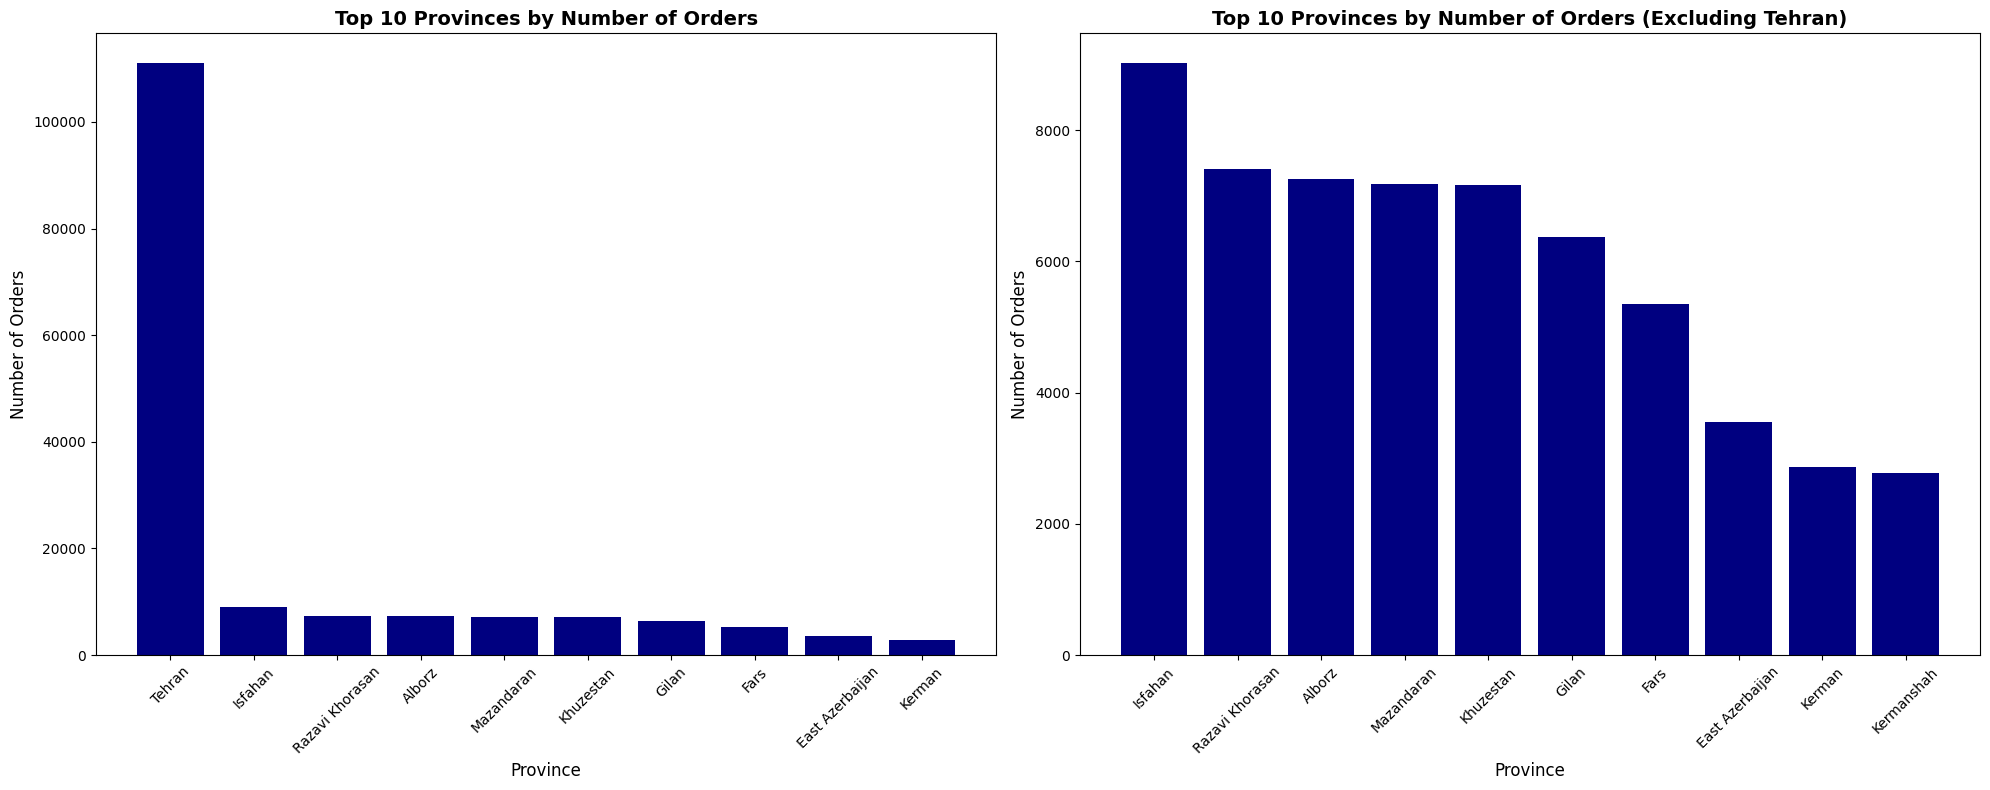

In [74]:
# Calculate total orders counts per each province in dataset
order_per_province = dff_orders['province'].value_counts()
order_per_province = order_per_province.sort_values(ascending=False).rename("order_count")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 provinces
mp10 = order_per_province.head(10)
axes[0].bar(mp10.index, mp10.values, color='navy')
axes[0].set_xlabel('Province', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)
axes[0].set_title('Top 10 Provinces by Number of Orders', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 provinces excluding Tehran (2 to 11)
mp11 = order_per_province[1:11]
axes[1].bar(mp11.index, mp11.values, color='navy')
axes[1].set_xlabel('Province', fontsize=12)
axes[1].set_ylabel('Number of Orders', fontsize=12)
axes[1].set_title('Top 10 Provinces by Number of Orders (Excluding Tehran)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 8. Scatter Plots

In this section, I plot relationship between population of provinces, with total number of orders made by them. 

As you see, there is a good linear relationship.

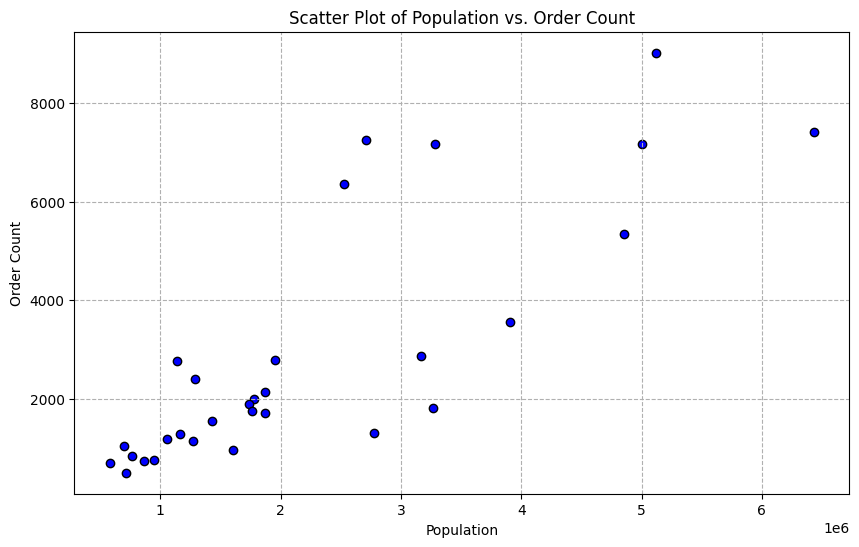

In [86]:
province_info = pd.read_excel('../Digikala Dataset/province_info.xlsx', sheet_name='Sheet1')

pp = order_per_province.copy()[1:] # exclude Tehran

# Merge province_population_counts with province_population on the 'province' column
pp = pp.reset_index().merge(province_info[province_info.columns[:-1]], on='province')

plt.figure(figsize=(10, 6))
plt.scatter(pp['population'], pp['order_count'], color='blue', edgecolor='black')

plt.title('Scatter Plot of Population vs. Order Count')
plt.xlabel('Population')
plt.ylabel('Order Count')
plt.grid(True, linestyle='--')

plt.show()

# 9. Bubble Chart + Interactive Chart

In [ ]:
import plotly.express as px

# Assuming dff_orders is already loaded and contains the necessary columns
# Calculate the average order amount per city
avg_order_amount = dff_orders.groupby('city')['Amount_Gross_Order'].mean()

# Get the top 10 cities by number of orders
order_per_city = dff_orders['city'].value_counts().sort_values(ascending=False)

top_10_cities = order_per_city.head(10).index

# Prepare the data for the top 10 cities
top_10_data = pd.DataFrame({
    'City': top_10_cities,
    'Number of Orders': order_per_city[top_10_cities],
    'Average Order Amount': avg_order_amount[top_10_cities]
})

# Create the interactive bubble chart
fig = px.scatter(
    top_10_data,
    x='City',
    y='Number of Orders',
    size='Average Order Amount',
    color='City',
    hover_name='City',
    hover_data={'Number of Orders': True, 'Average Order Amount': True},
    title='Interactive Bubble Chart: Number of Orders vs. Average Order Amount by City',
    labels={'Number of Orders': 'Number of Orders', 'Average Order Amount': 'Average Order Amount'},
    size_max=60
)

# Customize layout
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Orders',
    title_font_size=16,
    hovermode='closest'
)

# Show the plot
fig.show()

# 10. Error Bars

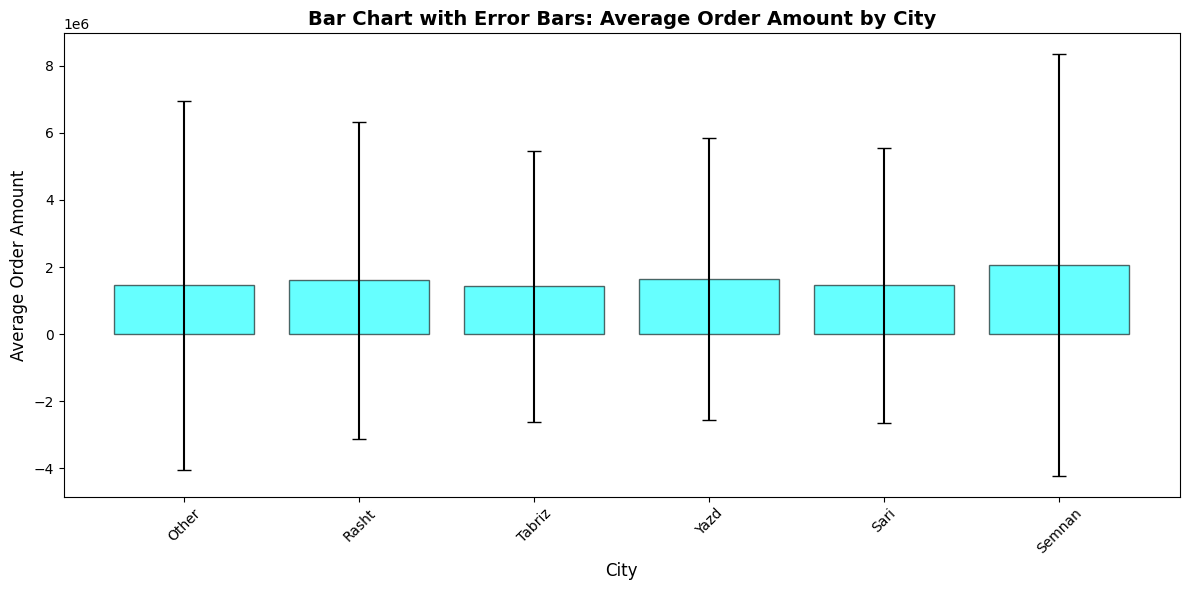

In [ ]:
# Calculate the average and standard deviation of order amounts per city
city_stats = dff_orders.groupby('city')['Amount_Gross_Order'].agg(['mean', 'std'])

# Get the top 10 cities by number of orders
top_10_cities = order_per_city.head(10).index

# Filter the data for the top 10 cities
top_10_stats = city_stats.loc[top_10_cities]

# Create the bar chart with error bars
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_stats.index,
    top_10_stats['mean'],
    yerr=top_10_stats['std'],
    capsize=5,  # Add caps to the error bars
    color='cyan',
    alpha=0.6,
    edgecolor='black'
)

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Order Amount', fontsize=12)
plt.title('Bar Chart with Error Bars: Average Order Amount by City', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()